In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix


train_df = pd.read_csv(r"C:\Users\BHAVIN\Desktop\UOP Sem 1\Personal Project\Project 2 - Digit recognition\mnist_train.csv\mnist_train.csv")
test_df = pd.read_csv(r"C:\Users\BHAVIN\Desktop\UOP Sem 1\Personal Project\Project 2 - Digit recognition\mnist_test.csv\mnist_test.csv")

In [2]:
train_df.shape

(60000, 785)

In [3]:
test_df.shape

(10000, 785)

In [4]:
X_train = train_df.iloc[:,1:]
y_train = train_df.iloc[:,0]

X_test = test_df.iloc[:,1:]
y_test = test_df.iloc[:,0]

In [5]:
def display_images(images, labels, n=10):
    plt.figure(figsize=(10, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        img = images.iloc[i].values.reshape(28, 28)
        plt.imshow(img, cmap='gray')
        plt.title(f"Label: {labels.iloc[i]}")
        plt.axis('off')
    plt.show()

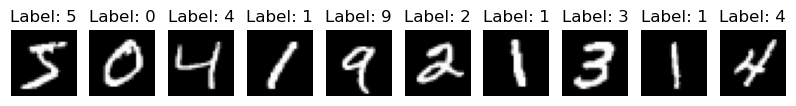

In [6]:
display_images(X_train, y_train)

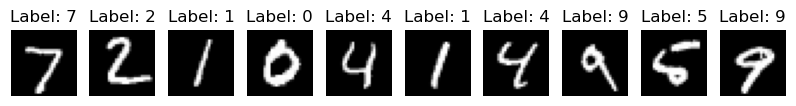

In [7]:
display_images(X_test, y_test)

## 1) GaussianNB()

In [8]:
# Train a Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [9]:
y_pred = model.predict(X_test)

In [10]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.93      0.77       958
           7       0.88      0.27      0.42      1028
           8       0.28      0.67      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000

Confusion Matrix:
 [[ 870    0    3    5    2    5   31    1   35   28]
 [   0 1079    2    1    0    0   10    0   38    5]
 [  79   25  266   91    5    2  269    4  271   20]
 [  32   39    6  353    2    3   51   

### The image displays the classification report and confusion matrix for a digit recognition model. The model's accuracy is 69%. The precision, recall, and f1-score vary significantly across different digits, with some like 1 and 0 performing well, while others like 5 and 8 perform poorly. The confusion matrix shows numerous instances of misclassification, particularly for digits 2, 5, 7, and 8. Overall, the model demonstrates some predictive capability but also exhibits considerable room for improvement, especially in correctly identifying certain digits.

### We will try a different Naive Bayes model to see if we can improve the accuracy

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

In [12]:
scaler = MinMaxScaler()

In [13]:
X_train_normal = scaler.fit_transform(X_train)
X_test_normal = scaler.transform(X_test)

## 2) Multinomial NB

In [14]:
multi_model = MultinomialNB()
multi_model.fit(X_train_normal, y_train)

MultinomialNB()

In [15]:
y_pred_multi = multi_model.predict(X_test_normal)

In [16]:
print("Classification Report:\n", classification_report(y_test, y_pred_multi))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_multi))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.91      0.93      0.92      1135
           2       0.90      0.83      0.86      1032
           3       0.80      0.84      0.82      1010
           4       0.84      0.74      0.79       982
           5       0.87      0.66      0.75       892
           6       0.89      0.90      0.89       958
           7       0.93      0.84      0.88      1028
           8       0.66      0.80      0.72       974
           9       0.71      0.85      0.77      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.84      0.84     10000

Confusion Matrix:
 [[ 912    0    2    6    1    8   14    1   36    0]
 [   0 1061    5    9    0    1    6    0   52    1]
 [  15   11  858   24   10    3   32   12   66    1]
 [   4   11   34  852    1   19    7   

### The model achieves an overall accuracy of 84%. The precision, recall, and f1-score for each digit class (0 through 9) are mostly above 0.7, indicating reasonably good performance across the board, with particularly high scores for classes 0, 1, and 6. The lowest scores are observed for class 8 in precision and for class 5 in recall. The confusion matrix shows the distribution of predictions across all classes, with high true positive rates for most classes, as indicated by the high numbers along the matrix's diagonal. There is some confusion between certain classes, such as 3 and 5, or 4 and 9, which are slightly more often misclassified as indicated by higher off-diagonal numbers. Overall, the model demonstrates strong predictive power but with some specific areas that could be improved.

## 3) Bernoulli NB

In [17]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
#Binarising the Data
X_train_binarized = X_train.applymap(lambda x: 1 if x > 0 else 0)
X_test_binarized = X_test.applymap(lambda x: 1 if x > 0 else 0)

In [19]:
model_bernoulli = BernoulliNB()

In [20]:
model_bernoulli.fit(X_train_binarized, y_train)

BernoulliNB()

In [21]:
y_pred_bernoulli = model_bernoulli.predict(X_test_binarized)

In [22]:
print("Classification Report:\n", classification_report(y_test, y_pred_bernoulli))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bernoulli))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       980
           1       0.90      0.96      0.93      1135
           2       0.89      0.83      0.86      1032
           3       0.76      0.84      0.80      1010
           4       0.83      0.81      0.82       982
           5       0.82      0.70      0.76       892
           6       0.89      0.89      0.89       958
           7       0.93      0.85      0.89      1028
           8       0.75      0.78      0.77       974
           9       0.75      0.84      0.79      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Confusion Matrix:
 [[ 887    0    4    7    2   41   16    1   22    0]
 [   0 1085   10    5    0    9    6    0   19    1]
 [  19    8  852   29   17    4   32   14   55    2]
 [   5   15   34  844    0   13    9   

### The model has achieved an accuracy of 84%. The classification report provides precision, recall, and f1-scores for each digit class (0-9), with values mostly above 0.7, indicating a good performance with some variation between classes. The digits '1' and '7' have the highest f1-scores, showing a strong balance between precision and recall, while '3' and '8' have lower scores, indicating room for improvement in classifying these digits correctly. The confusion matrix details the number of predictions for each class, with higher numbers on the diagonal indicating correct predictions. The off-diagonal numbers highlight where misclassifications have occurred, such as between '3' and '5', or '4' and '9'.

## 4) Using PCA with Guassian NB to check if we can improve the accuracy

In [23]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [24]:
#Initialising PCA
pca = PCA(n_components=0.95) #Retaining 95% data

In [25]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [26]:
model_gnb = GaussianNB()

In [27]:
model_gnb.fit(X_train_pca,y_train)

GaussianNB()

In [28]:
y_pred_gnb_pca = model_gnb.predict(X_test_pca)

In [29]:
print("Classification Report:\n", classification_report(y_test, y_pred_gnb_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb_pca))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       980
           1       0.98      0.95      0.96      1135
           2       0.72      0.84      0.78      1032
           3       0.81      0.85      0.83      1010
           4       0.89      0.85      0.87       982
           5       0.83      0.85      0.84       892
           6       0.94      0.89      0.91       958
           7       0.92      0.82      0.87      1028
           8       0.86      0.86      0.86       974
           9       0.82      0.84      0.83      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Confusion Matrix:
 [[ 899    0   51    2    0   17    6    0    4    1]
 [   3 1073    5    7   13    5   13    5   10    1]
 [  15    0  865   75    8    6    6   11   42    4]
 [   3    0   45  862    1   32    3   

### The model has an overall accuracy of 87%. Precision, recall, and F1-score across different digit classes range from 0.72 to 0.98, 0.82 to 0.95, and 0.78 to 0.96, respectively, indicating generally high performance. The confusion matrix indicates correct classifications along the diagonal, with some misclassifications evident in non-diagonal cells, though these are relatively few. The class with the lowest precision and F1-score is '2', and the highest scores are observed for '1'. Overall, the model shows robust classification ability across the ten digit classes.

# 5) KNN Algorithm

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [31]:
scaler = StandardScaler()

In [32]:
X_train_knn = scaler.fit_transform(X_train)
X_test_knn = scaler.transform(X_test)

In [33]:
#KNN Algorithm
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [34]:
knn_classifier.fit(X_train_knn, y_train)

KNeighborsClassifier()

In [35]:
y_pred_knn = knn_classifier.predict(X_test_knn)

In [36]:
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.96      0.93      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.94      0.94      0.94       982
           5       0.93      0.92      0.93       892
           6       0.96      0.97      0.97       958
           7       0.94      0.92      0.93      1028
           8       0.96      0.90      0.93       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

Confusion Matrix:
 [[ 963    0    1    3    1    5    6    1    0    0]
 [   0 1129    3    0    0    0    3    0    0    0]
 [  14    6  960   20    5    0    7    9   10    1]
 [   0    3    5  962    3   13    0   

### Precision, recall, and F1-scores are relatively high across all classes, ranging from 0.92 to 0.97, indicating good predictive performance and a balanced recognition of each class. The total accuracy of the model is 0.94, which is corroborated by macro and weighted averages of the same value. The confusion matrix further supports this by showing that most predictions fall along the diagonal (correct predictions), with relatively few misclassifications, demonstrating the model's overall effectiveness.

# K Clustering

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [38]:
scaler = StandardScaler()
X_train_kclt = scaler.fit_transform(X_train)
X_test_kclt = scaler.transform(X_test)

In [39]:
#K-Clustering
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [40]:
# Initializing kmeans model
kmeans = KMeans(n_clusters=5, random_state=0)

In [41]:
#Fitting the model
kmeans.fit(X_train_kclt)

D:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

# Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
#Initialising the model
model_classifier = DecisionTreeClassifier()

In [44]:
model_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
y_pred_classifier = model_classifier.predict(X_test)

In [46]:
print("Classification Report:\n", classification_report(y_test, y_pred_classifier))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classifier))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.96      1135
           2       0.87      0.86      0.86      1032
           3       0.85      0.85      0.85      1010
           4       0.87      0.88      0.88       982
           5       0.83      0.84      0.83       892
           6       0.89      0.88      0.89       958
           7       0.91      0.91      0.91      1028
           8       0.83      0.81      0.82       974
           9       0.85      0.86      0.86      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Matrix:
 [[ 915    1    6    7    6   15   11    6    6    7]
 [   0 1092    9    2    0    9    6    4   12    1]
 [  14   11  884   27   14   14   12   27   21    8]
 [  10    6   33  858    6   40    3   

### The model presents an overall accuracy of 88%, as indicated by the classification report. It shows a strong predictive performance with precision, recall, and F1-scores mostly above 0.80 for each digit class (0 through 9). The highest precision is observed for class 1 at 0.95, and the highest recall is for class 1 as well, at 0.96, suggesting that the model is particularly effective at correctly identifying and classifying images of the digit '1'. Conversely, the model shows slightly weaker performance for class 8, with the lowest precision of 0.83, and for class 3, with the lowest recall of 0.86. The confusion matrix reveals some areas of misclassification, such as class 4 being mistaken for class 9, which occurred 20 times. Despite these areas, the high numbers along the diagonal of the confusion matrix confirm that the model has a high true positive rate for most classes, affirming its overall robustness in classifying the MNIST digits, albeit with room for refinement in distinguishing between certain digits that have a higher tendency to be confused with one another.

# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
model_randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
model_randomforest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [49]:
y_pred_rf = model_randomforest.predict(X_test)

In [50]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix:
 [[ 971    0    0    0    0    2    3    1    3    0]
 [   0 1127    2    2    0    1    2    0    1    0]
 [   6    0 1002    5    3    0    3    8    5    0]
 [   1    0    9  972    0    9    0   

### The classification report shows very high precision, recall, and F1-scores for each of the ten digit classes (0 through 9), with all metrics mostly above 0.95, which indicates excellent model performance across all classes. The model achieves an overall accuracy of 97%, with the macro average, and weighted average for precision, recall, and F1-score also at 0.97. The confusion matrix corroborates this high accuracy, with most predicted labels matching the true labels, as shown by the high numbers along the diagonal for each class. For instance, the model correctly predicted the digit "0" 971 times out of 980 occurrences. There are very few misclassifications, as seen by the relatively low numbers off the diagonal. The model seems to perform exceptionally well in differentiating between the different digits, indicating a robust predictive capability.

# SVM Classifier

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

In [52]:
# Split data into features and labels
X_train = train_df.drop('label', axis=1) 
y_train = train_df['label']

X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

In [53]:
# Initialize the Support Vector Machine classifier
svm_classifier = SVC()

#Fitting the model

svm_classifier.fit(X_train,y_train)

SVC()

In [54]:
y_pred_svm = svm_classifier.predict(X_test)

In [55]:
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion Matrix:
 [[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0   

### The model achieves a remarkable overall accuracy of 98%, with precision, recall, and F1-scores consistently high across all digit classes (0 through 9), predominantly at 0.97 or above, suggesting excellent predictive performance. The confusion matrix reinforces this high level of accuracy, showing a strong diagonal with high values, indicating that the majority of digits were correctly classified. Very few misclassifications are evident, as non-diagonal values are low, demonstrating the model's effectiveness in distinguishing between different digits with minimal confusion. The uniform high scores across all metrics for each class reflect the model's robustness and reliability in digit classification tasks.

## Summary
### Comparing the performance of various machine learning models on a digit recognition task reveals distinct levels of accuracy and precision:

### Gaussian NB: Exhibited moderate accuracy (69%) with significant variation in performance across different digits, indicating room for improvement, especially for digits like 5 and 8.

### Multinomial NB: Showed improved accuracy (84%) over Gaussian NB, with good performance across most digit classes but still some misclassifications evident.

### Bernoulli NB: Matched Multinomial NB in accuracy (84%) and demonstrated good classification ability, with some digits such as '3' and '8' having room for improvement.

### PCA with Gaussian NB: Improved accuracy to 87%, indicating that dimensionality reduction had a positive impact on the Gaussian NB model's ability to classify digits.

### KNN Algorithm: Achieved a high accuracy (94%) with consistently strong precision, recall, and F1-scores across all classes, indicating a well-balanced and effective model.

### Decision Tree Classifier: Scored an accuracy of 88%, with solid performance across all classes and particularly strong results for digit '1'. However, some classes like '3' and '8' were prone to misclassification.

### Random Forest: Outperformed the single Decision Tree with an impressive accuracy of 97%, showing excellent precision and recall across all digit classes and very few misclassifications.

### SVM Classifier: Topped the chart with an accuracy of 98%, demonstrating exceptional performance across all metrics and classes, making it the most robust and reliable among the evaluated models for this particular task.

### In summary, ensemble methods like Random Forest and advanced models like SVM outperform simpler models such as Naive Bayes and the single Decision Tree, especially in a complex task like digit recognition. They show superior predictive power and reliability, with Random Forest offering a balance between performance and model complexity, while SVM provides the highest accuracy and precision.